In [1]:
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading and cleaning the dataframes

Reading in a collection of yearly datasets from the EPA- one dataset per year since 2004. Combining all data from each of those datasets into one larger dataframe, `aqi_df`.

In [2]:
aqi_df = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')], ignore_index = True)

In [4]:
# Separating out only the data associated with the city of San Francisco. This corresponds to CBSA Code == 41860.
sf_aqi_df = aqi_df[aqi_df['CBSA Code'] == 41860].reset_index()

In [6]:
sf_aqi_df.dtypes

index                         int64
CBSA                         object
CBSA Code                     int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

In [5]:
sf_aqi_df.head()

,index,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,126005,"San Francisco-Oakland-Hayward, CA",41860,2004-01-01,54,Moderate,PM2.5,06-081-1001,15
1,126006,"San Francisco-Oakland-Hayward, CA",41860,2004-01-02,51,Moderate,PM2.5,06-001-0007,14
2,126007,"San Francisco-Oakland-Hayward, CA",41860,2004-01-03,60,Moderate,PM2.5,06-001-0007,14
3,126008,"San Francisco-Oakland-Hayward, CA",41860,2004-01-04,107,Unhealthy for Sensitive Groups,SO2,06-013-0002,15
4,126009,"San Francisco-Oakland-Hayward, CA",41860,2004-01-05,56,Moderate,PM2.5,06-081-1001,14


In [8]:
# Because the "Date" column is an object type, I want to convert it to datetime and then add a column 
# with the ordinal number associated with each date (since I know I'll be using linear regression later).
sf_aqi_df['Date'] = pd.to_datetime(sf_aqi_df['Date'], format = '%Y-%m-%d')
sf_aqi_df['ordinal'] = pd.to_datetime(sf_aqi_df['Date']).apply(lambda date: date.toordinal())

In [9]:
# Also parsing out the year and months into new columns so we can use for indexing later on.
sf_aqi_df['Year'] = pd.DatetimeIndex(sf_aqi_df['Date']).year
sf_aqi_df['Month'] = pd.DatetimeIndex(sf_aqi_df['Date']).month

In [10]:
sf_aqi_df.head()

,index,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,ordinal,Year,Month
0,126005,"San Francisco-Oakland-Hayward, CA",41860,2004-01-01,54,Moderate,PM2.5,06-081-1001,15,731581,2004,1
1,126006,"San Francisco-Oakland-Hayward, CA",41860,2004-01-02,51,Moderate,PM2.5,06-001-0007,14,731582,2004,1
2,126007,"San Francisco-Oakland-Hayward, CA",41860,2004-01-03,60,Moderate,PM2.5,06-001-0007,14,731583,2004,1
3,126008,"San Francisco-Oakland-Hayward, CA",41860,2004-01-04,107,Unhealthy for Sensitive Groups,SO2,06-013-0002,15,731584,2004,1
4,126009,"San Francisco-Oakland-Hayward, CA",41860,2004-01-05,56,Moderate,PM2.5,06-081-1001,14,731585,2004,1


# Filtering for relevant data
Creating two new datasets that represent both pre- and post- 2012 AQI data.

In [11]:
# Creating two different data sets based on year. 
# I'm looking to parse out all AQI data before 2012 from all AQI data during or after 2012.
sf_before_2012 = sf_aqi_df[sf_aqi_df['Year'] < 2012]
sf_after_2012 = sf_aqi_df[sf_aqi_df['Year'] >= 2012]

# Setting up the linear regression model
Prepping the data into features (x-values) and outcomes, then creating and fitting the model with that data. Will use the predictions to show the trend line later on.


In [13]:
# Setting up for Linear Regression by setting my X and Y arrays for both my pre-2012 and post-2012 dataframes.
before_2012_x = sf_before_2012['ordinal'].values.reshape(-1,1)
after_2012_x = sf_after_2012['ordinal'].values.reshape(-1,1)
before_2012_y = sf_before_2012['AQI'].values.reshape(-1,1)
after_2012_y = sf_after_2012['AQI'].values.reshape(-1,1)

In [15]:
# Setting up the Linear Regression model and fitting to the X and Y arrays for each pre and post dataframe.
# Then predicting the outcomes for plotting later on.
before_2012_model = LinearRegression()
before_2012_model.fit(before_2012_x, before_2012_y)
before_2012_model_predict = before_2012_model.predict(before_2012_x)

In [16]:
after_2012_model = LinearRegression()
after_2012_model.fit(after_2012_x, after_2012_y)
after_2012_model_predict = after_2012_model.predict(after_2012_x)

# Plotting the trend line
Plotting out all the data points, and overlaying the best fit linear regression line. The left graph indicates how AQI trended downward slightly from 2004 to 2012, while the right graph shows an increase in AQI since 2012.

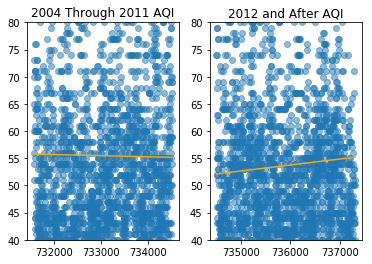

In [18]:
plt.subplot(1,2,1)
plt.scatter(before_2012_x, before_2012_y, alpha = 0.5)
plt.plot(before_2012_x, before_2012_model_predict, color = 'orange')
plt.ylim(40, 80)
plt.title("2004 Through 2011 AQI")
plt.subplot(1,2,2)
plt.scatter(after_2012_x, after_2012_y, alpha = 0.5)
plt.plot(after_2012_x, after_2012_model_predict, color = 'orange')
plt.ylim(40, 80)
plt.title("2012 and After AQI")
plt.show()